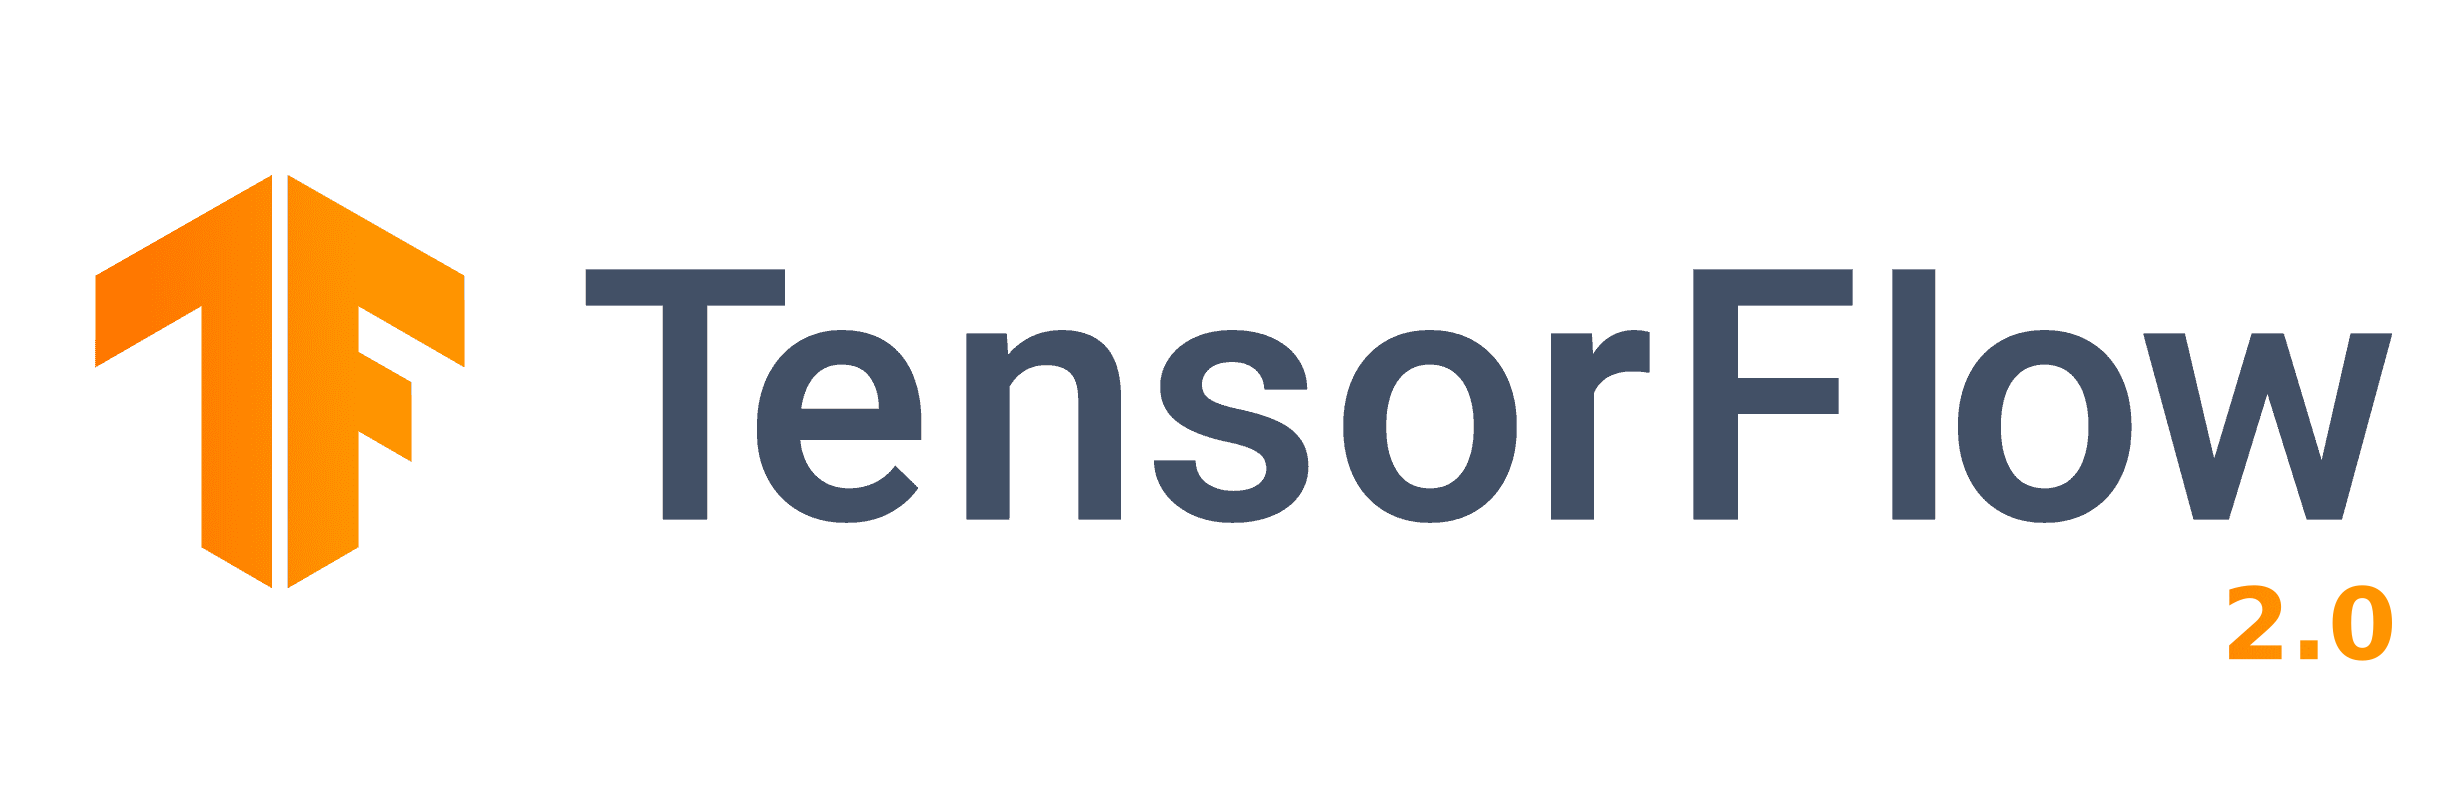

텐서플로우는 다양한 작업에 대해 데이터 흐름 프로그래밍을 위한 오픈소스 소프트웨어 라이브러리이다. 
심볼릭 수학 라이브러리이자, 인공 신경망같은 기계 학습 응용프로그램 및 딥러닝에도 사용된다.

# Tensorflow를 이용한 wine 분류

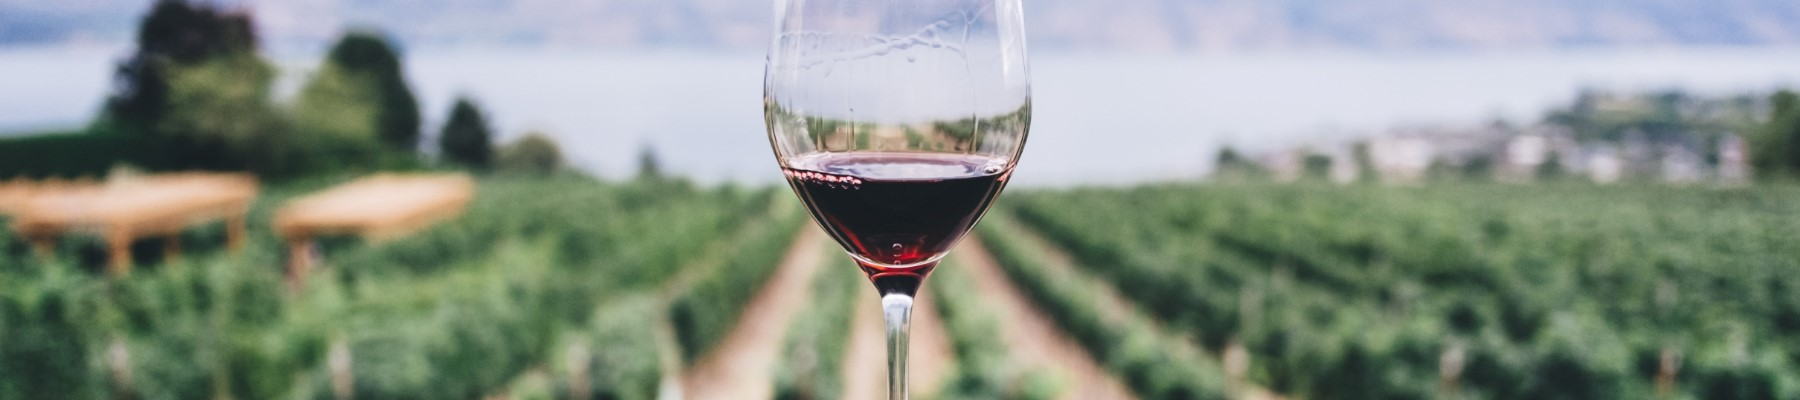

In [ ]:
from tensorflow.keras import models, layers, utils
import numpy as np
import pandas as pd

## Wine Data 읽기

In [ ]:
wine = pd.read_csv('https://bit.ly/wine-date')

In [ ]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [ ]:
wine.tail()

,alcohol,sugar,pH,class
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0
6496,11.8,0.8,3.26,1.0


In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [ ]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [ ]:
np.unique(wine['class'])

array([0., 1.])

## Data, Target 분리 

In [ ]:
input = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

## Train, Test 분리

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    input, target, test_size=0.2, random_state=11
)

In [ ]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(5197, 3) (1300, 3)
(5197,) (1300,)


## Model 생성

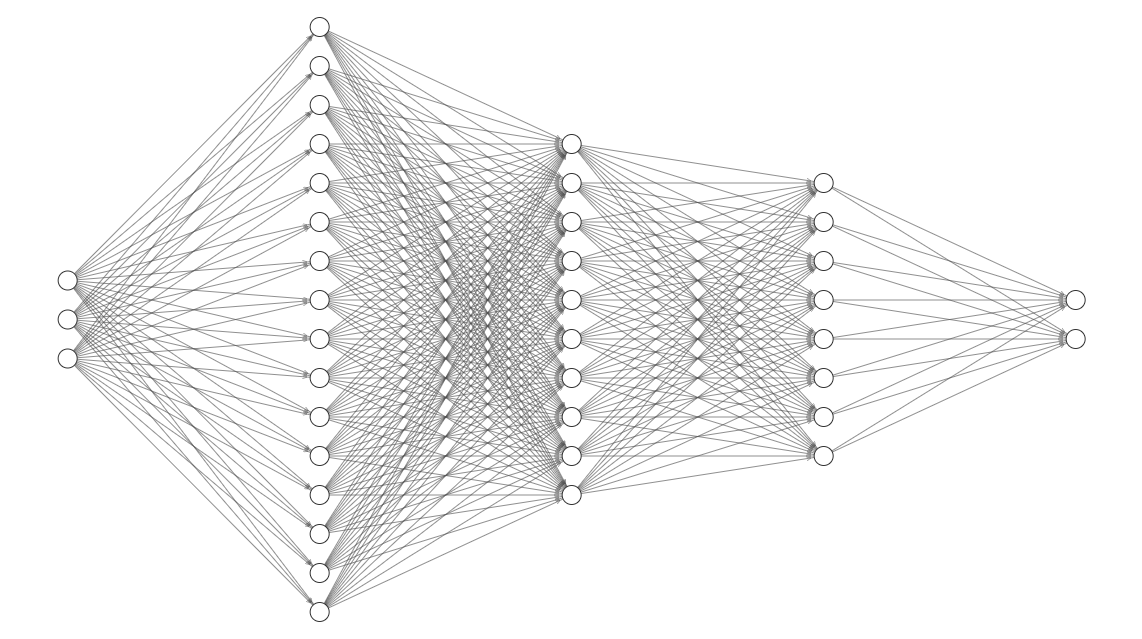

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(3,)))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               512       
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 8)                 264       
                                                                 
 dense_8 (Dense)             (None, 2)                 18        
                                                                 
Total params: 11,130
Trainable params: 11,130
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics='accuracy')

## 손실함수(loss, cost)

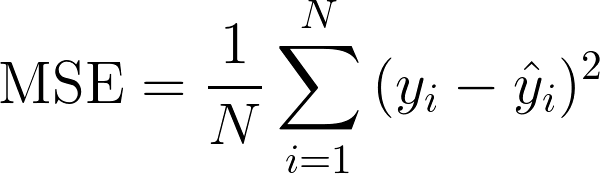

## 손실함수의 종류

### RMSE(Root Mean Squared Error)

 

MSE에 루트(√)를 씌운 것으로 MSE와 기본적으로 동일하다. MSE 값은 오류의 제곱을 구하기 때문에 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 은 값의 왜곡을 줄여준다.

 

### Binary Crossentropy
 

실제 레이블과 예측 레이블 간의 교차 엔트로피 손실을 계산한다. 레이블 클래스(0, 1로 가정)가 2개만 존재할 때 Binary Crossentropy를 사용하면 좋다. 

 

### Categorical Crossentropy


다중 분류 손실함수로 출력값이 one-hot encoding 된 결과로 나오고 실측 결과와의 비교시에도 실측 결과는 

one-hot encoding 형태로 구성된다.

예를 들면 출력 실측값이 아래와 같은 형태(one-hot encoding)로 만들어 줘야 하는 과정을 거쳐야 한다.
[[0 0 1]
 [0 1 0]
 [1 0 0]]  (배치 사이즈 3개인 경우)

네트웍 레이어 구성시 마지막에 Dense(3, activation='softmax') 로 3개의 클래스 각각 별로 positive 확률값이 나오게 된다.


[0.2, 0.3, 0.5]


위 네트웍 출력값과 실측값의 오차값을 계산한다.

 

 

### Sparse_Categorical_Crossentropy

 

'categorical_entropy'처럼 다중 분류 손실함수이지만, 샘플 값은 정수형 자료이다. 예를 들어, 샘플 값이 아래와 같은 형태일 수 있다. (배치 사이즈 3개)


[0, 1, 2] 


네트웍 구성은 동일하게 Dense(3, activation='softmax')로 하고 출력값도 3개가 나오게 된다.

즉, 샘플 값을 입력하는 부분에서 별도 원핫 인코딩을 하지 않고 정수값 그대로 줄 수 있다. 이런 자료를 사용할 때, 컴파일 단계에서 손실 함수만  'sparse_categorical_crossentropy'로 바꿔주면 된다.

 

# 경사하강법

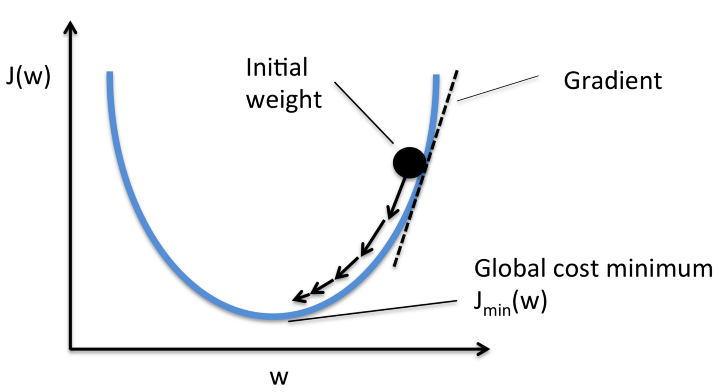

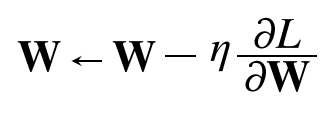

### 각종 Optimizer

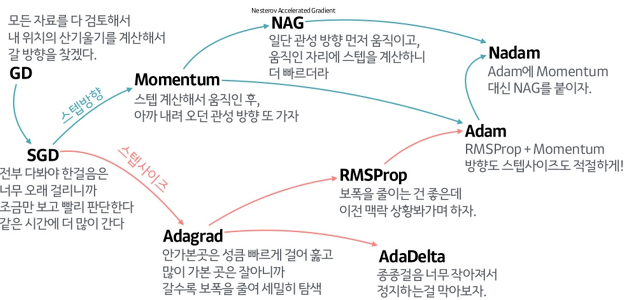

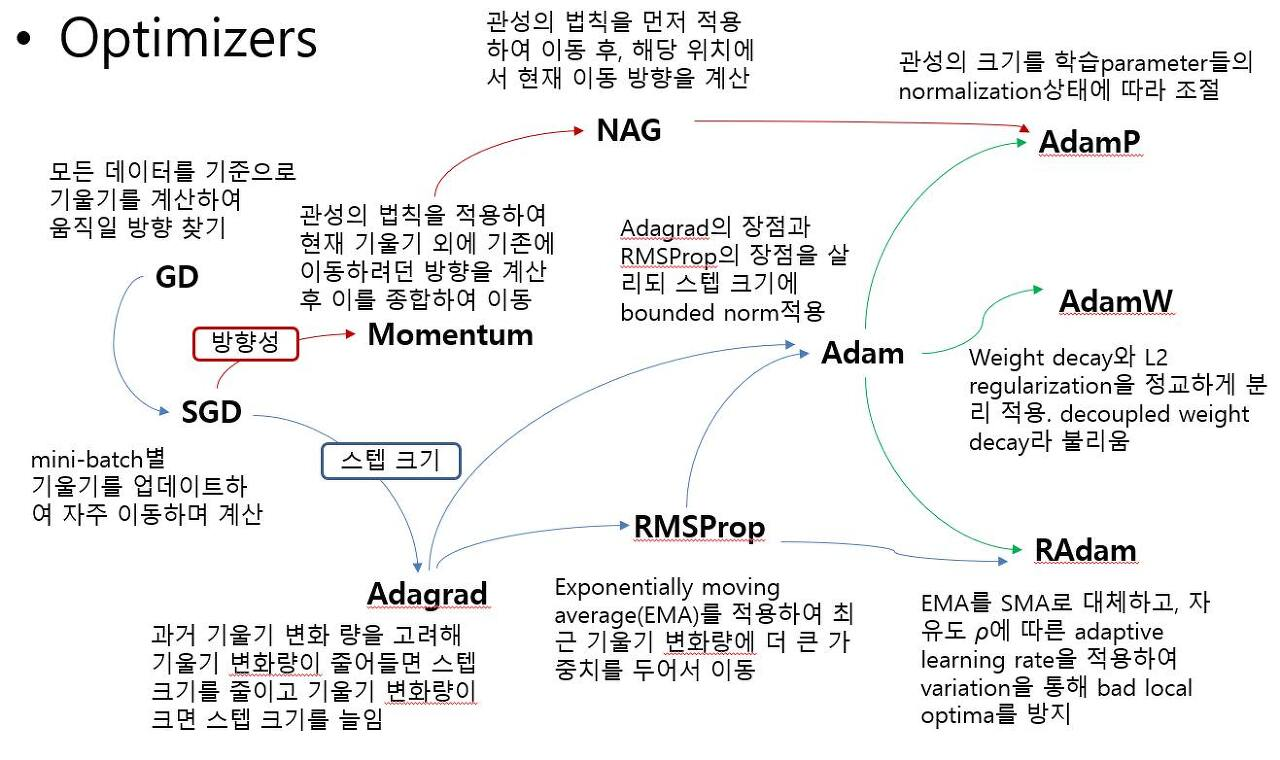

## Model 학습

In [ ]:
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
163/163 [==============================] - 1s 3ms/step - loss: 0.4178 - accuracy: 0.7862
Epoch 2/100
163/163 [==============================] - 0s 3ms/step - loss: 0.3573 - accuracy: 0.8393
Epoch 3/100
163/163 [==============================] - 0s 3ms/step - loss: 0.3428 - accuracy: 0.8534
Epoch 4/100
163/163 [==============================] - 0s 3ms/step - loss: 0.3366 - accuracy: 0.8547
Epoch 5/100
163/163 [==============================] - 0s 2ms/step - loss: 0.3301 - accuracy: 0.8582
Epoch 6/100
163/163 [==============================] - 0s 2ms/step - loss: 0.3384 - accuracy: 0.8516
Epoch 7/100
163/163 [==============================] - 0s 2ms/step - loss: 0.3288 - accuracy: 0.8618
Epoch 8/100
163/163 [==============================] - 0s 2ms/step - loss: 0.3264 - accuracy: 0.8566
Epoch 9/100
163/163 [==============================] - 0s 2ms/step - loss: 0.3357 - accuracy: 0.8541
Epoch 10/100
163/163 [==============================] - 0s 2ms/step - loss: 0.3259 - accura

## Model 평가

In [ ]:
model.evaluate(x_test, y_test)

41/41 [==============================] - 0s 2ms/step - loss: 0.3322 - accuracy: 0.8515


[0.3322488069534302, 0.8515384793281555]

In [ ]:
model.predict(x_test[:10])

array([[0.07337413, 0.9266259 ],
       [0.04244181, 0.95755816],
       [0.12468855, 0.8753114 ],
       [0.5046739 , 0.49532607],
       [0.00345109, 0.99654895],
       [0.05149823, 0.9485017 ],
       [0.01528467, 0.98471534],
       [0.03591122, 0.9640888 ],
       [0.74010754, 0.25989246],
       [0.6358876 , 0.3641124 ]], dtype=float32)

In [ ]:
pred=np.argmax(model.predict(x_test[:20]), axis=1)

In [ ]:
print(y_test[:20])

[1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.]


In [ ]:
wine_type = ['white', 'red']
[ wine_type[p] for p in pred ]

['red',
 'red',
 'red',
 'white',
 'red',
 'red',
 'red',
 'red',
 'white',
 'white',
 'red',
 'white',
 'red',
 'red',
 'red',
 'red',
 'white',
 'red',
 'red',
 'white']